<a href="https://colab.research.google.com/github/pankaj-beldar/Capstone_Project01_Airbnb_Booking_Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Airbnb, as in “Air Bed and Breakfast,” is a service that lets property owners rent out their spaces to travelers looking for a place to stay. Travelers can rent a space for multiple people to share, a shared space with private rooms, or the entire property for themselves. The model also gives you the opportunity to customize and personalize your guests’ experience the way you want. Airbnb was started in 2008 by Brian Chesky and Joe Gebbia, based in San Fransisco California.The platform is accessible via website and mobile app.

## <b> Problem Statement: <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

##Capstone Project_01 - 'Exploratory Data Analysis of Airbnb booking dataset'

We are going to find answers to the following questions - 

1. Which is the prefered location according to average best price?
2. Where are most of the hosts located?
3. The highest and lowest rent paying locations by customers
4. Most Popular/demanded host based on reviews and availability 365 days
5. Establishing relation between neighbourhood group and availability of rooms.
6. Which are the top hosts, neighbourhoods, neighbourhood groups based on their turnover?
7. Room type selection based on price, availability on 365 days.
8. Top ten neighbourhood based on listing price.
9. Distribution of properties based on Mandatory stays.
10. Type of Visit based on Mandatory stay allowed for single booking.


In [1]:
# Import the necessary python libraries
import numpy as np                             # Handles arrays and mathematical operations
import matplotlib.pyplot as plt                # Creates 2D graphs and arrays 
import pandas as pd                            # Data handling and wrangling
import seaborn as sns                          # Statistical graphical distributions

In [2]:
# Mount Google Drive to read data available
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [3]:
# From pandas read csv file
df = pd.read_csv('/content/Airbnb NYC 2019.csv')

In [4]:
# Check first 5 instances of data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Check the size of Dataset
df.shape

(48895, 16)

In [6]:
# Check non- null count, data type in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# Check column names in dataset
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

#Data set has following features - 

1) id - Unique id identifying Airbnb listing

2) name - Represents accomodation

3) host_id - Unique id identifying Airbnb Host

4) host_name - Name under whom host is registered

5) neighbourhood_group - A group of area

6) neighbourhood - neighbourhood_group falls under area

7) latitude- coordinates of listing

8) longitude- coordinates of listing

9) room_type- types of accomodation present

10) price- tariff of listing

11) minimum_nights- minimum nights required to stay during single visit

12) number_of_reviews - total count of reviews given by customers

13) last_review - date of last reviews given  

14) review_per_month - reviews recieved per month 

15) calculated_host_listings_count - total number of listing registered under host name

16) availability_365 - number of days host/property is available throughout the year

In [8]:
# Check for any null values if present in columns
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Columns like name, host name, last_review and reviews_per_month have null values.

In [9]:
# Use fillna() method to replace the NULL values with a specified value.
df.fillna(0, inplace=True)

In [10]:
# Check  again for null values
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
# Describe function is used to get a descriptive status of the dataframe.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### We see that minimum price is zero which is not possible and max value of minimum nights is 1250 which is not possible.So we assign 100$ to minimum price and setting a limit of minimum_nights not exceeding 365.

In [12]:
# Use dropna() to remove rows having null values
df.dropna().head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
# Define a function to correct minimum price , we replace where price is zero to 100$
def price_correction(z):
    if z==0:
        return 100
    else:
        return z

In [14]:
# Identify Rows which have 'price'=0
df[df['price']==0]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [15]:
# Replace all price = 0 by price = 100 $
df['price']=df['price'].apply(price_correction)

In [16]:
df['price'].isnull().sum()

0

In [17]:
# Maximum stay can't be  greater than 365 days hence we have to define a function to set maximum of minimum_night to 365
def minimum_night_count(y):
 if y > 365:
    y==365
 else:
    y==y
    return y

In [18]:
# Apply Maximum of Minimum_nights to 365
df['minimum_nights']= df['minimum_nights'].apply(minimum_night_count)

In [19]:
# Check whether the corrected values in the particular features have been updated in dataframe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48881.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.743184,6.840429,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.144546,16.452017,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


### Now the above data in the dataframe is ready for analysis.

# 1.What is prefered location according to average best price?

In [20]:
avg_preffered_price_df = df.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean()
avg_preffered_price_df.columns= [x.replace('neighbourhood_group','location') for x in list(avg_preffered_price_df.columns)]
avg_preffered_price_df

,location,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.941718
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.338006
4,Brooklyn,Private room,76.559317
5,Brooklyn,Shared room,51.012107
6,Manhattan,Entire home/apt,249.246685
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [21]:
avg_preffered_price_df.sort_values('price', ascending=False)[0:5]

,location,room_type,price
6,Manhattan,Entire home/apt,249.246685
3,Brooklyn,Entire home/apt,178.338006
12,Staten Island,Entire home/apt,173.846591
9,Queens,Entire home/apt,147.050573
0,Bronx,Entire home/apt,127.506596


Inferences-
 1. Top 5 locations based on average price are Manhatton, Brooklyn, Staten iasland, Queens, Bronx 

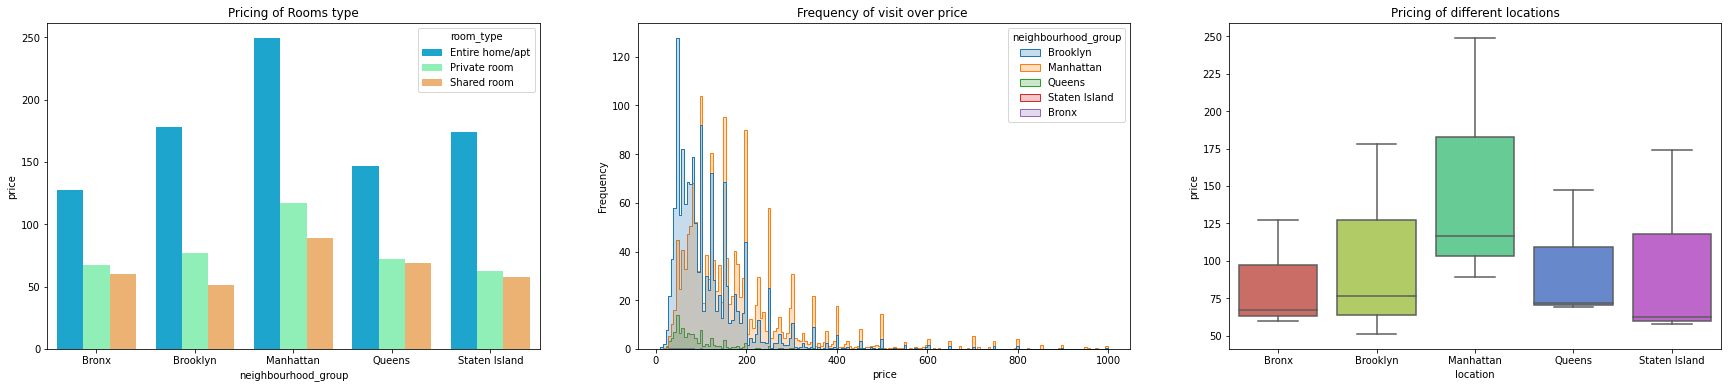

In [22]:
# let us plot the various graphs to find out relation between neighbourhood groups , room types and price
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
ax = axes.flatten()
mean_price_df = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='neighbourhood_group', y ='price', hue='room_type', ax=ax[0], palette='rainbow')
sns.boxplot(x='location', y='price', data= avg_preffered_price_df, palette='hls')
sns.histplot(data=df[df['price'] < 1000], x="price", hue="neighbourhood_group", stat='frequency', element='step', ax=ax[1])
ax[0].set_title("Pricing of Rooms type");
ax[1].set_title("Frequency of visit over price ");
ax[2].set_title("Pricing of different locations");

In [23]:
room_type_data=df['room_type'].value_counts()
room_type_data

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Count of Room Types')

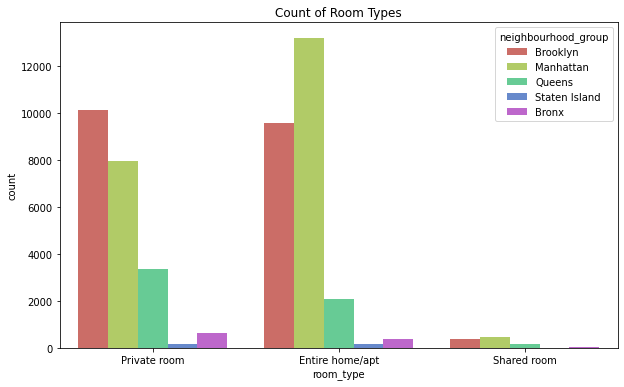

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['room_type'],hue=df['neighbourhood_group'], palette='hls')
plt.title('Count of Room Types')

Inferences-
1. Location Manhattan (Neighbourhood Group) is more prefered in all types of rooms
2. Pricing of Manhattan group is high as compared to other groups
3. Pricing and count of Entire home/ apartment is high as compared to shared room and private rooms in all locations
4. Count of Private room is more in Brooklyn  than entire home or apartment

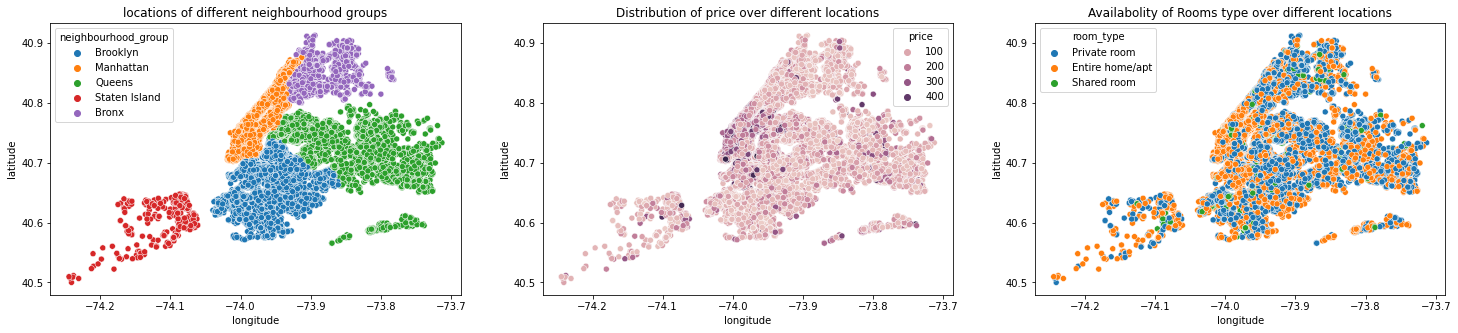

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
ax = axes.flatten()
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group' ,ax=ax[0])
sns.scatterplot(data=df[df['price']<500], x='longitude', y='latitude', hue='price', ax=ax[1])
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type', ax=ax[2])
ax[0].set_title("locations of different neighbourhood groups");
ax[1].set_title("Distribution of price over different locations");
ax[2].set_title("Availabolity of Rooms type over different locations");

Text(0.5, 1.0, 'Pair plot with different Location')

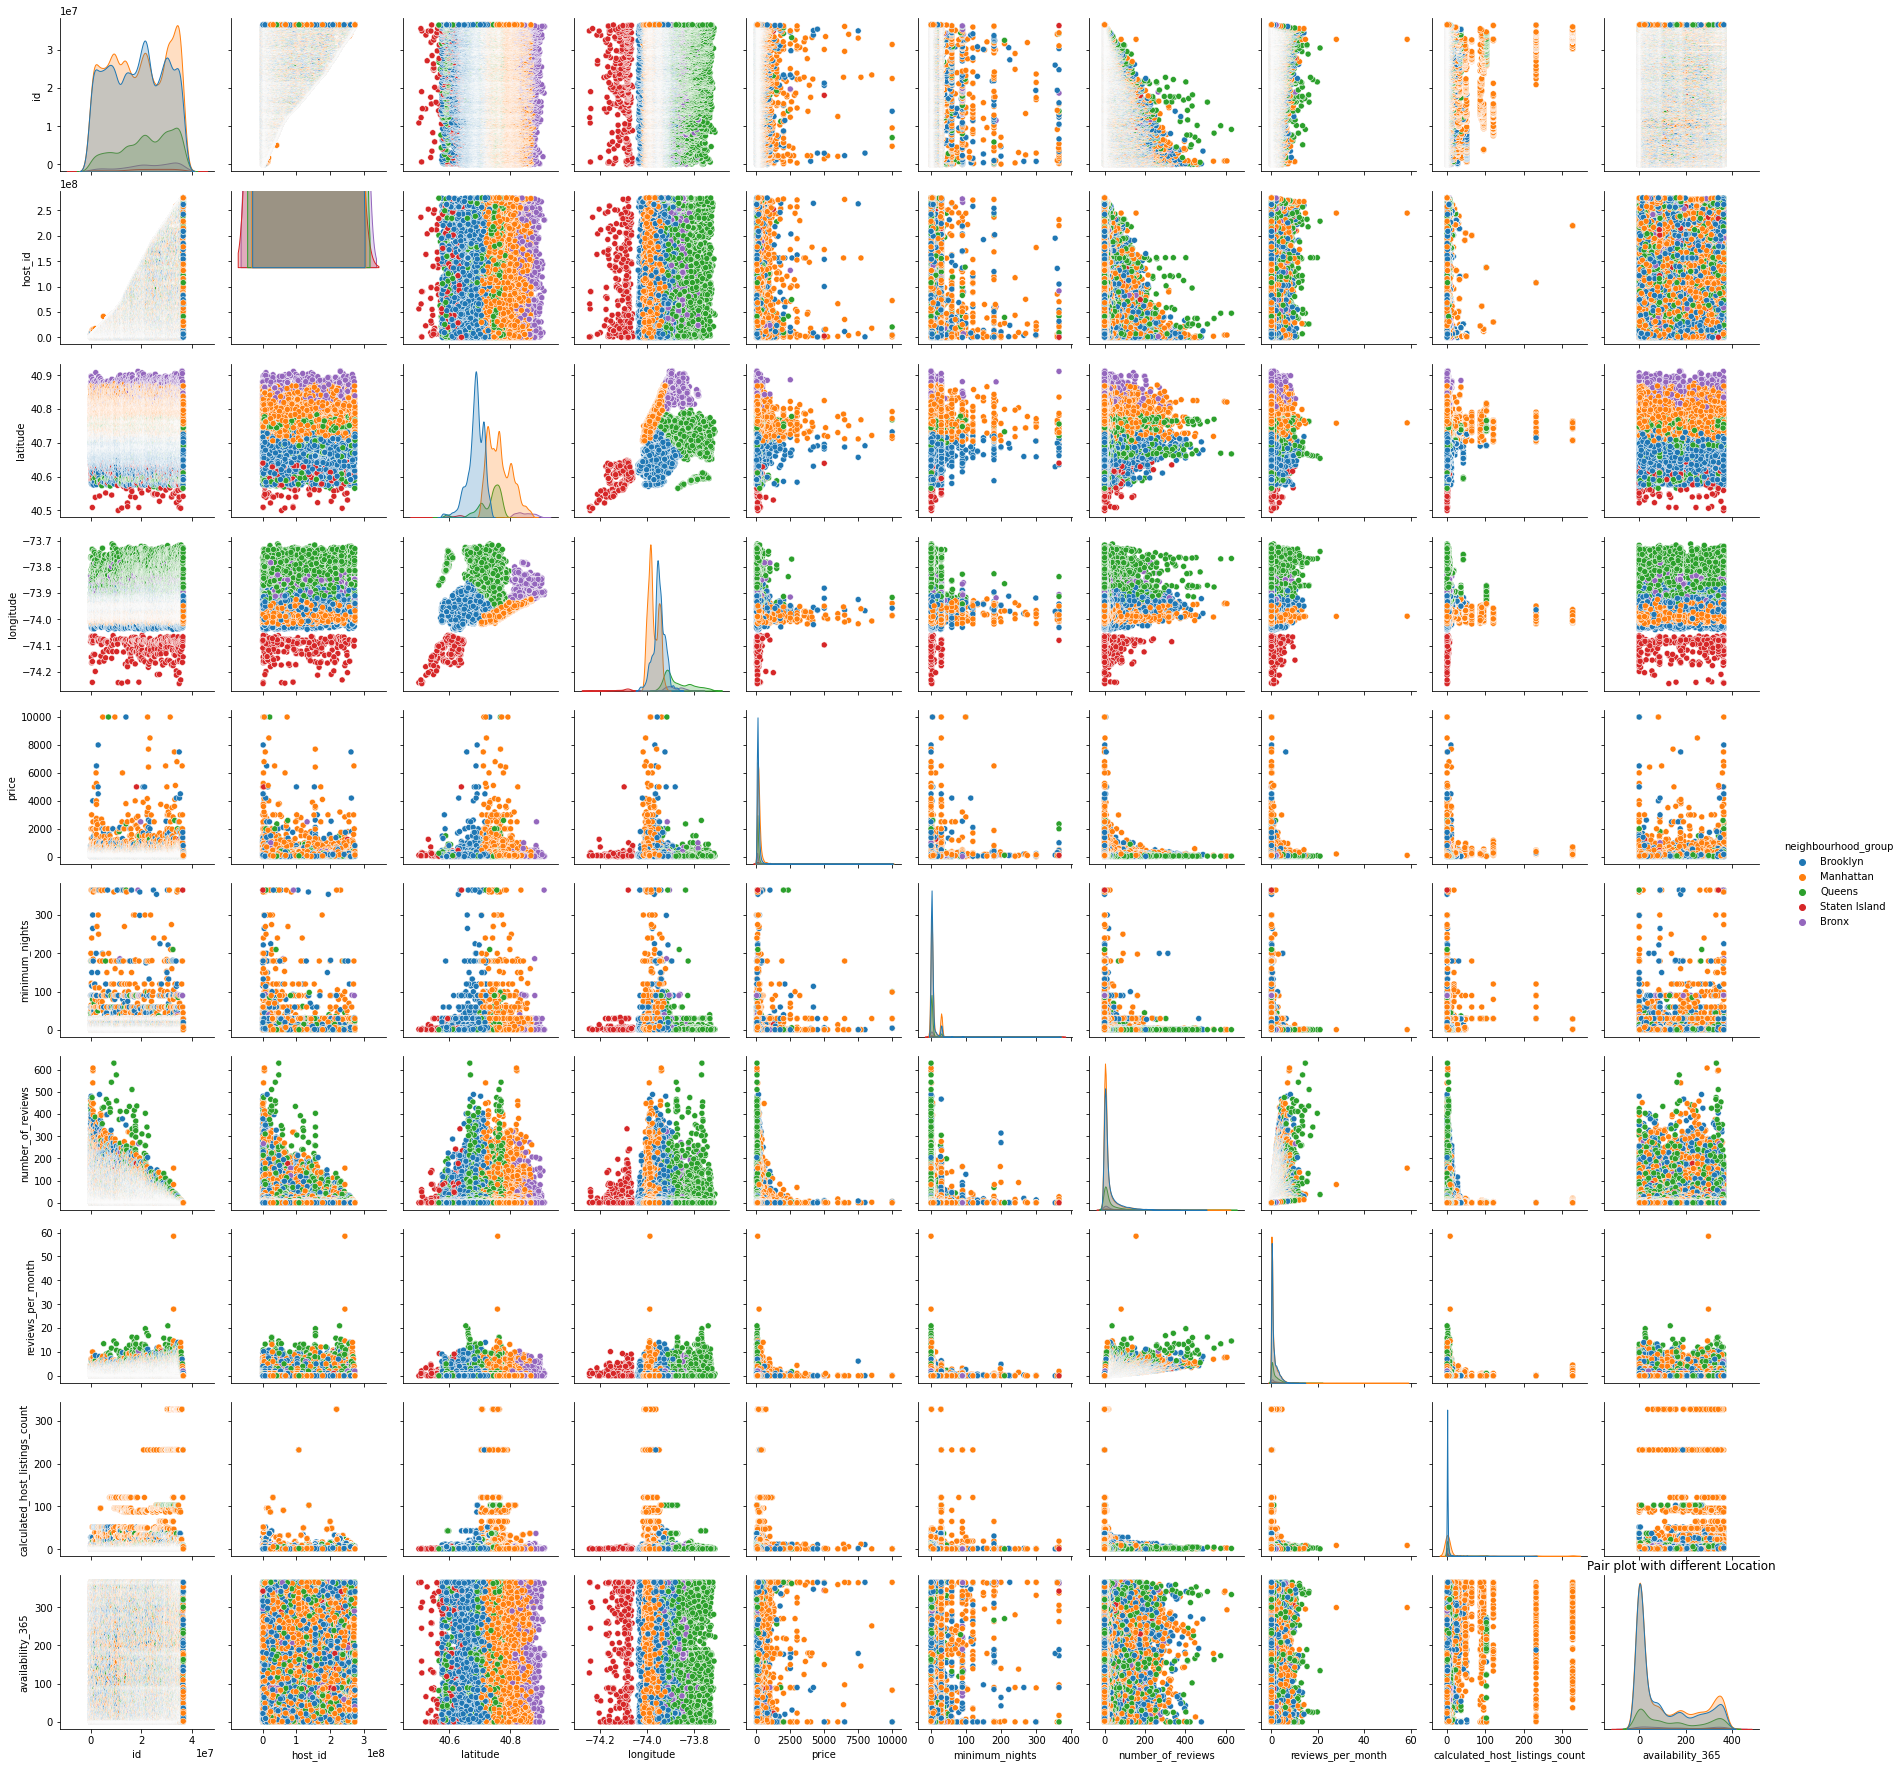

In [26]:
#A pairplot plot a pairwise relationships in a dataset. here we can see distribution of each pair with neighbourhood groups.
sns.pairplot(data=df, hue='neighbourhood_group')
plt.title('Pair plot with different Location')

Inferences-
1. From above pair plot we can conclude that most of the costomers are visiting to manhattan followed by brooklyn
2. Pricing, minimum night stay, averege listing price is more for manhattan region.

# 2. Where are most of the hosts located?

In [27]:
active_host= df.groupby('neighbourhood_group', as_index= False)['host_id'].count()
active_host.sort_values('host_id', ascending=False)

,neighbourhood_group,host_id
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


Text(0.5, 1.0, 'Where are most of the hosts located?')

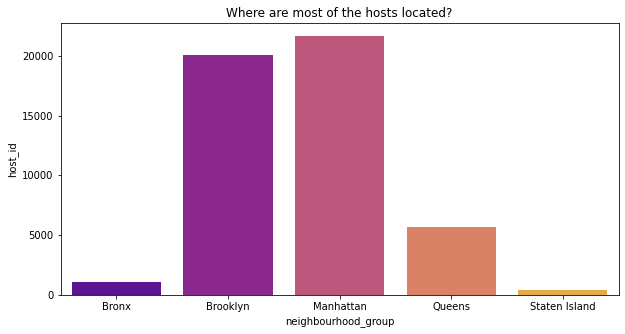

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(y='host_id',x= 'neighbourhood_group', data= active_host, palette='plasma')
plt.title('Where are most of the hosts located?')

In [29]:
no_of_active_host= df.groupby('neighbourhood_group')['host_id'].count()
no_of_active_host

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: host_id, dtype: int64

Text(0.5, 0, 'Location')

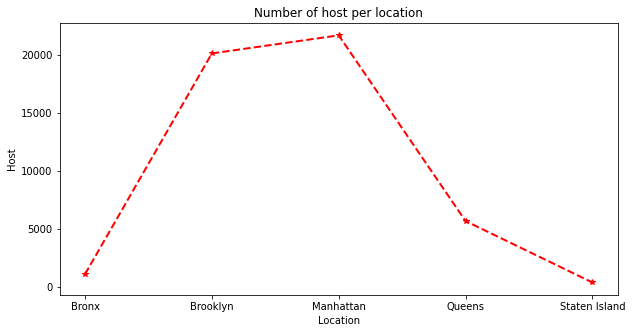

In [30]:
#Graph
plt.figure(figsize=(10,5))
plt.plot(no_of_active_host, 'r*--', lw=2)
plt.title('Number of host per location')
plt.ylabel('Host')
plt.xlabel('Location')

Inferences-
1. Manhattan has highest numbers of hosts (21661) followed by Brooklyn       (20104)

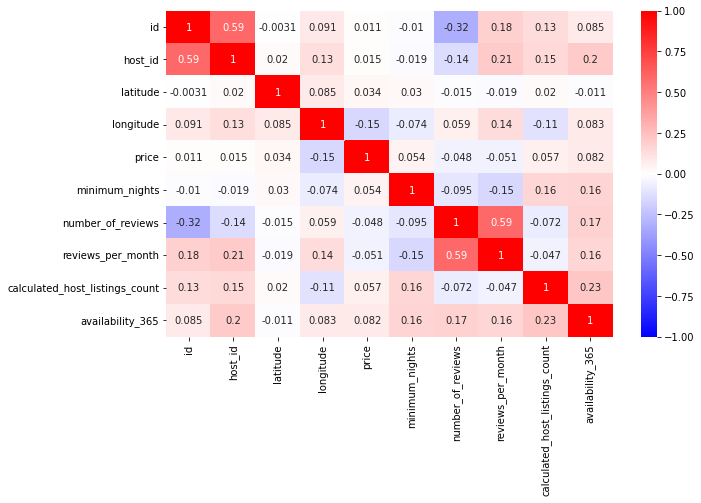

In [31]:
# let us plot heatmap of correction of all variables in dataset. use of colourbar is for getting highest and lowest correlation 
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(), linewidths=0, vmin=-1, annot=True, cmap="bwr")
plt.show()

Inferences-
1. High correlation number represents high correlation between two variables
eg. number of reviews and reviews per month has correction factor as 0.59 which represents they are highly correlated.
2. low correlation number represents less correlation between two variables.
eg.  host id and minimun nights has correlation factor -0.019 which represents they are not much dependent on each other

# 3. The highest and lowest rent paying locations by costomers  

In [32]:
#Get the highest rent according to location using groupby method
max_price_df = df.groupby('neighbourhood_group',as_index=False)['price'].max().sort_values(['price'],ascending = False).rename(columns = {'price':'Maximum price','neighbourhood_group':'Location'})
#Get the lowest rent according to location using gorupby method
min_price_df = df.groupby('neighbourhood_group',as_index=False)['price'].min().sort_values(['price'],ascending = True).rename(columns = {'price':'Minimum price','neighbourhood_group':'Location'})
price_df= pd.merge(max_price_df, min_price_df, how= 'inner')
price_df

,Location,Maximum price,Minimum price
0,Brooklyn,10000,10
1,Manhattan,10000,10
2,Queens,10000,10
3,Staten Island,5000,13
4,Bronx,2500,10


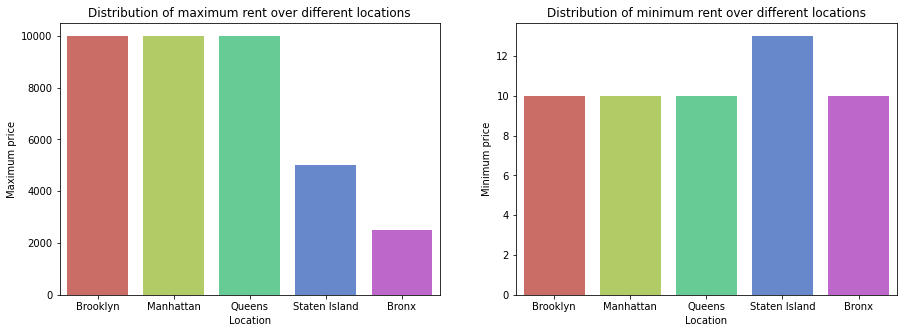

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = axes.flatten()
sns.barplot(x='Location',y='Minimum price', data=price_df, ax=ax[1], palette='hls')
sns.barplot(x='Location',y='Maximum price', data=price_df, ax=ax[0], palette= 'hls')
ax[0].set_title("Distribution of maximum rent over different locations");
ax[1].set_title("Distribution of minimum rent over different locations");

Inferences-
1. Customers are paying highest rent price of 10000 and lowest rent price of 10 at manhattan ,brooklyn and queens location.

# 4.Most Popular/demanded host based on reviews and calculated host listings count

In [34]:
#Get the host based on number of reviews using groupby method
host_based_on_review_df = df.groupby(['host_id','host_name','calculated_host_listings_count'],as_index=False)['number_of_reviews'].sum()

#Get the host based on availability in a year
host_based_on_availability_df = df.groupby(['host_id','host_name','calculated_host_listings_count'],as_index=False)['calculated_host_listings_count'].count().sort_values(['calculated_host_listings_count'],ascending = False)

top_host_df= pd.merge(host_based_on_availability_df, host_based_on_review_df, how='inner').sort_values(['calculated_host_listings_count','number_of_reviews'], ascending= False)
top_host_df.head()

,host_id,host_name,calculated_host_listings_count,number_of_reviews
0,219517861,Sonder (NYC),327,1281
1,107434423,Blueground,232,29
2,30283594,Kara,121,65
3,137358866,Kazuya,103,87
4,16098958,Jeremy & Laura,96,138


Inferences-

Top hosts based on reviews and calculated host listing count are Sonder, Blueground, Kara, Kazuya, Jeremy & Laura

# 5.Finding Relation between neighbourhood group and availability of rooms

[Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Staten Island'),
 Text(0, 0, 'Bronx')]

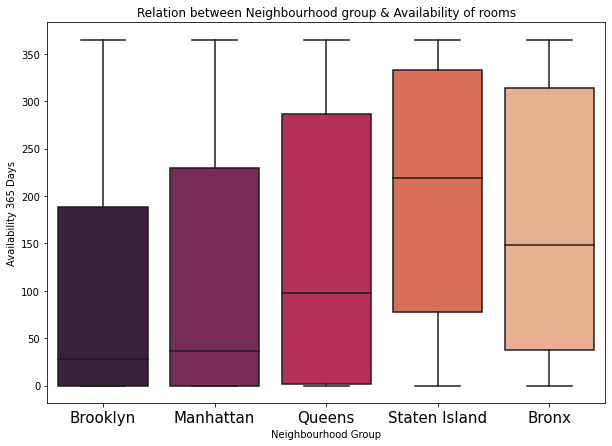

In [35]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='rocket')

# Naming the Chart
ax.set_title('Relation between Neighbourhood group & Availability of rooms')

# Naming X & Y axis
ax.set_ylabel('Availability 365 Days')
ax.set_xlabel('Neighbourhood Group')

#Adjusting Bar labels
ax.set_xticklabels(ax.get_xticklabels(), size = '15')

Inferences-
1. Staten island has highest availability of rooms over 365 days followed by bronx.
2. Brooklyn and manhattan has least availability of rooms 

# 6. Who are the top Hosts and which are the top Neighbourhoods, and Neighbourhood groups based on their turnover?

In [36]:
# Find out Top hosts, neighbourhoods, neighbourhood groups based on turnover
top_host = df.groupby(['host_name','host_id'], as_index= False)['price'].sum().reset_index().sort_values('price', ascending= False)
top_host.head()

,index,host_name,host_id,price
33240,33240,Sonder (NYC),219517861,82795
4876,4876,Blueground,107434423,70331
31247,31247,Sally,156158778,37097
29859,29859,Red Awning,205031545,35294
18986,18986,Kara,30283594,33581


### Inference
Top hosts based on turnover are Sonder(NYC), Blueground, Sally, Red Awning and Kara.

In [37]:
top_host_neighbourhood = df.groupby(['neighbourhood','host_id'], as_index= False)['price'].sum().reset_index().sort_values('price', ascending= False)
top_host_neighbourhood.head()

,index,neighbourhood,host_id,price
14252,14252,Financial District,219517861,57738
24660,24660,Midtown,205031545,35294
6912,6912,Chelsea,3750764,18780
31514,31514,Upper West Side,836168,15000
8144,8144,Clinton Hill,1177497,14850


### Inferences
1)Top neighbourhood are Financial District, Midtown, Chelsea, Upper West Side and Clinton Hill

2)All these neighbourhood belong to Manhattan neighbourhood group.

[Text(0.5, 1.0, 'Neighbourhood vs Turnover')]

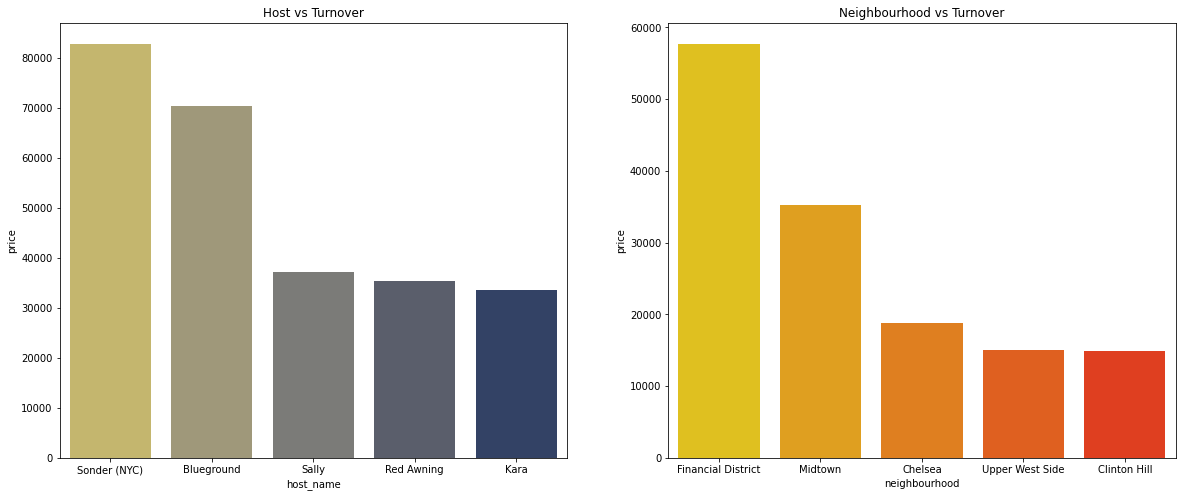

In [38]:
# Plot Barplot for visualization of the above analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax = axes.flatten()
sns.barplot(x='host_name', y='price', data = top_host.head() , ax=ax[0], palette='cividis_r').set(title ='Host vs Turnover')
sns.barplot(x='neighbourhood', y='price', data = top_host_neighbourhood.head(), ax=ax[1], palette='autumn_r').set(title ='Neighbourhood vs Turnover')

###Inference
 
Financial District being Manhattan city's buzzing heart very aptly coincides with our analysis to be on the top in case of Turnover.

#7. Room type selection based on price and it's availability on 365 days

Text(0.5, 1.0, 'Proportion of Room Types')

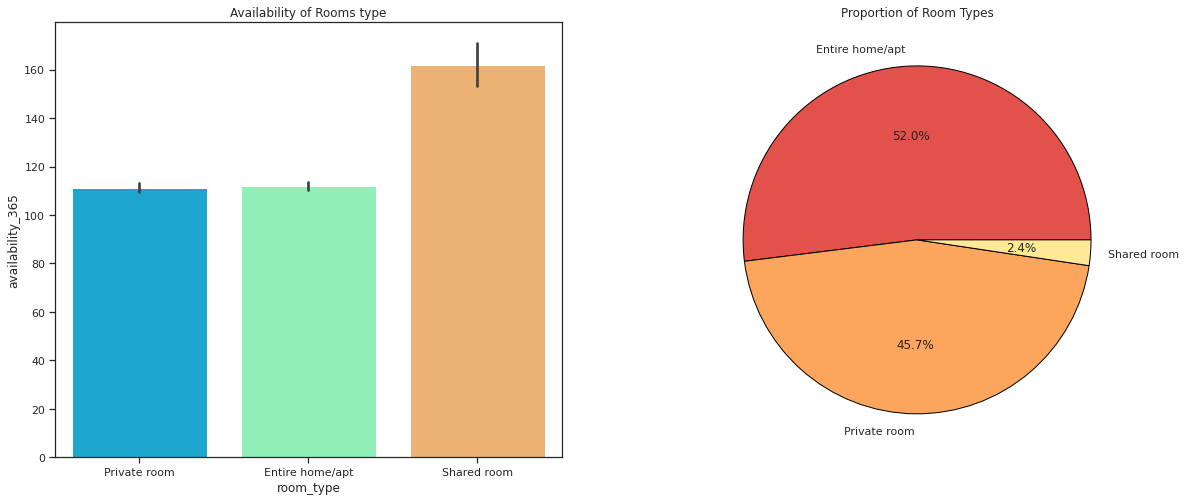

In [55]:
# Plot Barplot and Pie Chart for Data Visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax = axes.flatten()

#define Seaborn color palette to use
colors = sns.color_palette('Spectral')[0:5]

sns.barplot(data=df, x='room_type', y='availability_365', ax=ax[0], palette = 'rainbow' )
ax[0].set_title("Availability of Rooms type");
labels = df['room_type'].value_counts().index
sizes = df['room_type'].value_counts().values
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%',colors = colors, wedgeprops={"edgecolor": "black"}, frame=False)
ax[1].set_title('Proportion of Room Types')

### Inferences

1) Shared rooms are more available throughout the year as compared to Private rroms and Entire Home/Appartment making this easier for students or daily workers for their hault.

2) Entire Home/Apt and Private Rooms take a lion share in terms of their cummulative presence in the neighbourhoods.

3) Shared rooms have a meagre presence indicating not much demand of these rooms as nowadays less people are preferring to share common space and ammenities hence limiting it to a particular sect of customers.

Text(0.5, 1.0, 'Neighbourhood vs Price')

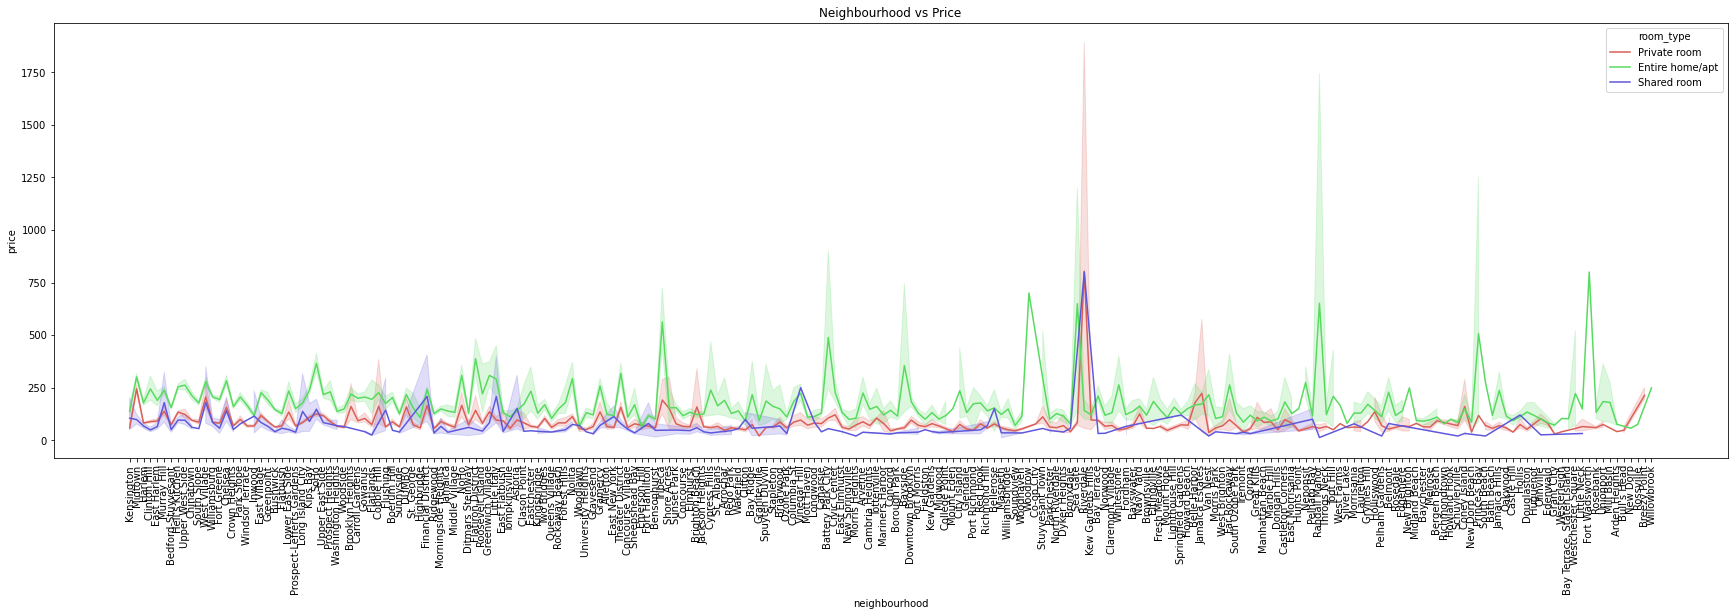

In [40]:
# Plot the line plot of dataframe for neighbourhood vs price
fig = plt.figure(figsize=(30, 8))
sns.lineplot(data=df, x='neighbourhood', y='price', hue='room_type',palette="hls")
plt.xticks(rotation=90)
plt.title('Neighbourhood vs Price')

###Inference

With this plot it is quite evident that Entire room/apt has all time high price throughout the neighbourhood.


Text(0.5, 1.0, 'Neighbourhood group vs Price')

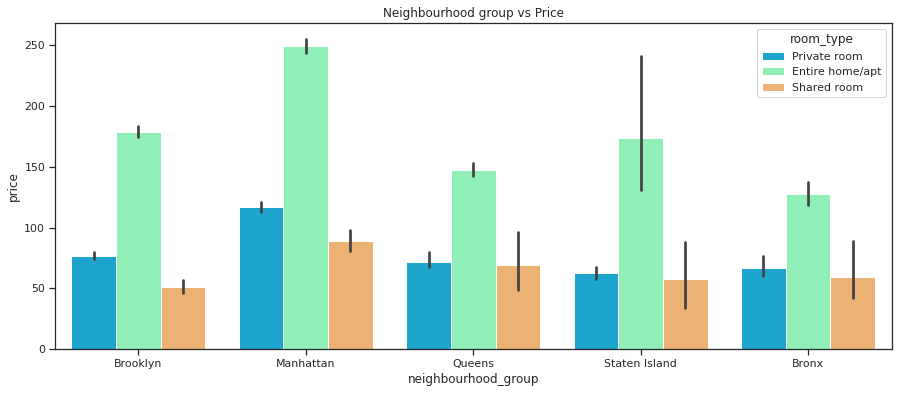

In [56]:
# Plot a barplot to visualize the neighbourhood and prices of various rooms
fig = plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type', palette="rainbow")
plt.title('Neighbourhood group vs Price')

###Inference

Entire home/apt has maintained higher price in all neighbourhoods and it is highest in Manhattan

Text(0.5, 1.0, 'Neighbourhood group vs Price')

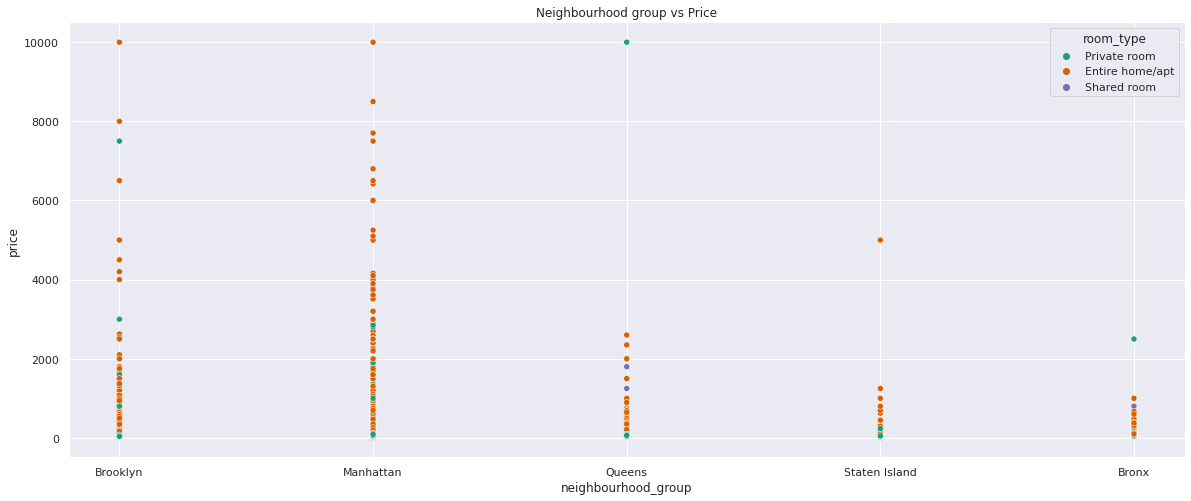

In [42]:
fig = plt.figure(figsize=(20, 8))
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df, x='neighbourhood_group', y='price', hue='room_type', palette="Dark2")
plt.title('Neighbourhood group vs Price')

###Inference

1) Manhattan and Brooklyn are posh areas with high end properties available.

2) The high end properties are mostly Entire Home/Apt.

#8. Top ten neighbourbourhood based on listing price

In [43]:
top_ten_neighborhoods=df.groupby('neighbourhood')['price'].agg('median').nlargest(n=10).sort_values(ascending = True)
top_ten_neighborhoods

neighbourhood
Financial District    200.0
West Village          200.0
Midtown               210.0
Flatiron District     225.0
Willowbrook           249.0
NoHo                  250.0
Neponsit              274.0
Tribeca               295.0
Woodrow               700.0
Fort Wadsworth        800.0
Name: price, dtype: float64

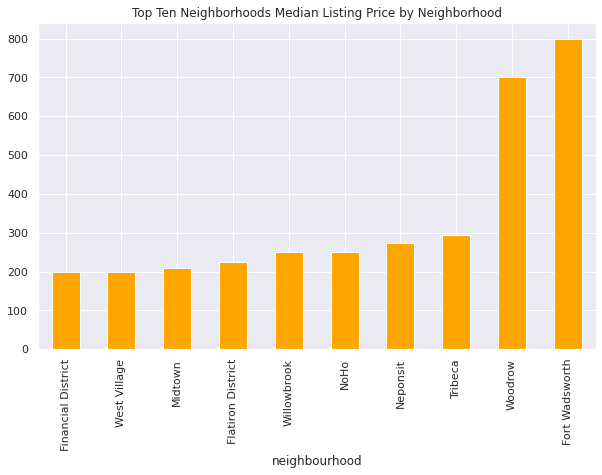

In [44]:
# Plot a bar graph for the above visualization
top_ten_neighborhoods.plot(kind = 'bar', title = 'Top Ten Neighborhoods Median Listing Price by Neighborhood', figsize=(10,6), color='orange')

### Inference

Fort Wadsworth and Woodrow are the two most expensive neighbourhoods listed belonging to Staten Island.

#9. Distribution of neighbourhoods based on properties/hosts mandatory stays

In [45]:
# Location where customers spends maximum mandatory nights
minimum_stay_df = df.groupby(('neighbourhood_group'), as_index=False)['minimum_nights'].mean()
minimum_stay_df 

,neighbourhood_group,minimum_nights
0,Bronx,4.560953
1,Brooklyn,5.895711
2,Manhattan,8.345371
3,Queens,5.010240
4,Staten Island,4.831099


Text(0.5, 1.0, 'Neighbourhood group vs Minimum night')

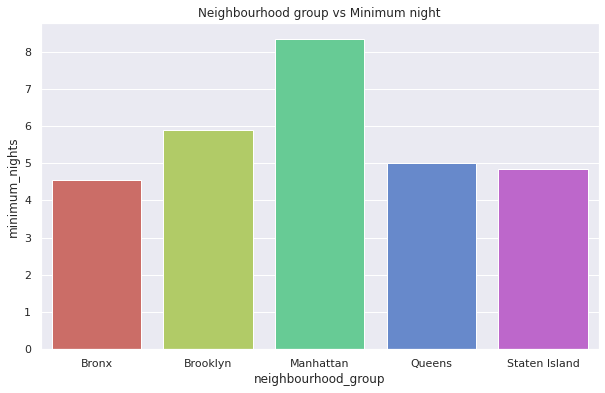

In [46]:
# Plot a barplot for the above visualization
fig = plt.figure(figsize=(10, 6))
sns.barplot(data= minimum_stay_df, x='neighbourhood_group', y='minimum_nights', palette="hls")
plt.title('Neighbourhood group vs Minimum night')

### Inferences

1) Most hosts allow mandatory stays less than 5 nights.

2) Manhattan has generally a higher average for mandatory nights required to stay followed by Brooklyn and Queens.

In [47]:
# Location where customers spend mandatory nights along with its price and neighbourhood
minimum_stayprice_df = df.groupby(['neighbourhood_group','price'], as_index=False)['minimum_nights'].mean()
minimum_stayprice_df

,neighbourhood_group,price,minimum_nights
0,Bronx,10,1.000000
1,Bronx,20,6.166667
2,Bronx,21,1.000000
3,Bronx,22,2.000000
4,Bronx,23,2.000000
...,...,...,...
1534,Staten Island,700,7.000000
1535,Staten Island,800,7.000000
1536,Staten Island,1000,1.000000
1537,Staten Island,1250,14.000000


Text(0.5, 1.0, 'Price vs Minimum night')

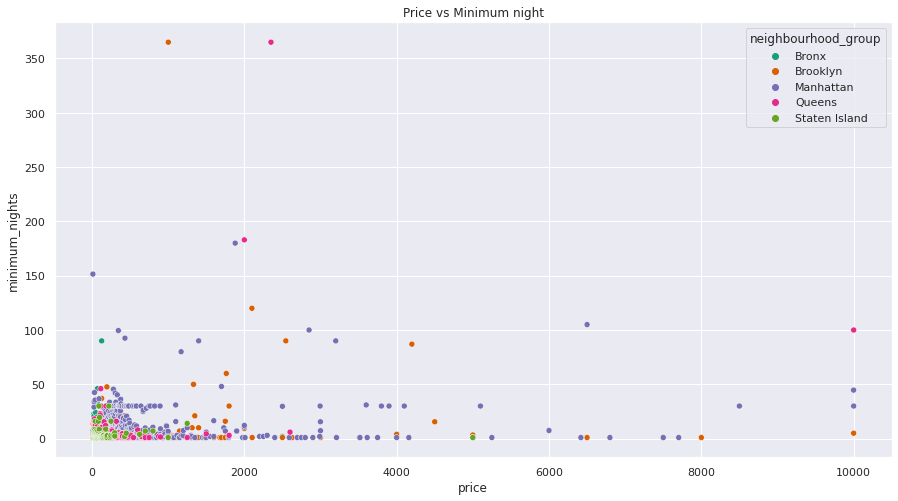

In [48]:
# Plot a scatterplot for the visualization
fig = plt.figure(figsize=(15, 8))
sns.set_theme(style="darkgrid")
sns.scatterplot(data= minimum_stayprice_df, x='price', y='minimum_nights', hue ='neighbourhood_group', palette="Dark2",marker = 'o')
plt.title('Price vs Minimum night')


### Inferences

1) Generally customers prefer to stay in accomodation having criteria for minimum number of mandatory stay and paying lesser price.

2) Manhattan has a wide spread of offerings both in terms of highest mandatory stay required to expensive listed properties. 

#10. Types of Visit based on Mandatory Stays allowed for a single booking.

In [49]:
# Identify the type of visits allowed
visit_df = df.groupby(['neighbourhood_group'], as_index=False)['minimum_nights'].mean()
visit_df

,neighbourhood_group,minimum_nights
0,Bronx,4.560953
1,Brooklyn,5.895711
2,Manhattan,8.345371
3,Queens,5.010240
4,Staten Island,4.831099


In [50]:
# Generate type of visit based upon stays allowed
visit_df['minimum_nights']
Trav_L = []
for i in visit_df['minimum_nights']:                       
  if i <= 5:
    Trav_L.append('short_term_visit')                 # Less than or equal to 5 days is Short Term Visit - For Business/Lesiure/Personal
  elif i > 5 and i <= 90:
    Trav_L.append('mid_term_visit')                   # Less than or equal to 90 days is Mid Term Visit - For Bagpackers
  else:
    Trav_L.append('long_term_visit')                  # More than 90 days is Long Term Visit - For Nirvana (Soul Searching)

In [51]:
# Add the column of Visit
visit_df['Travellers'] = Trav_L
visit_df

,neighbourhood_group,minimum_nights,Travellers
0,Bronx,4.560953,short_term_visit
1,Brooklyn,5.895711,mid_term_visit
2,Manhattan,8.345371,mid_term_visit
3,Queens,5.010240,mid_term_visit
4,Staten Island,4.831099,short_term_visit


Text(0.5, 1.0, 'Minimum nights vs Travellers')

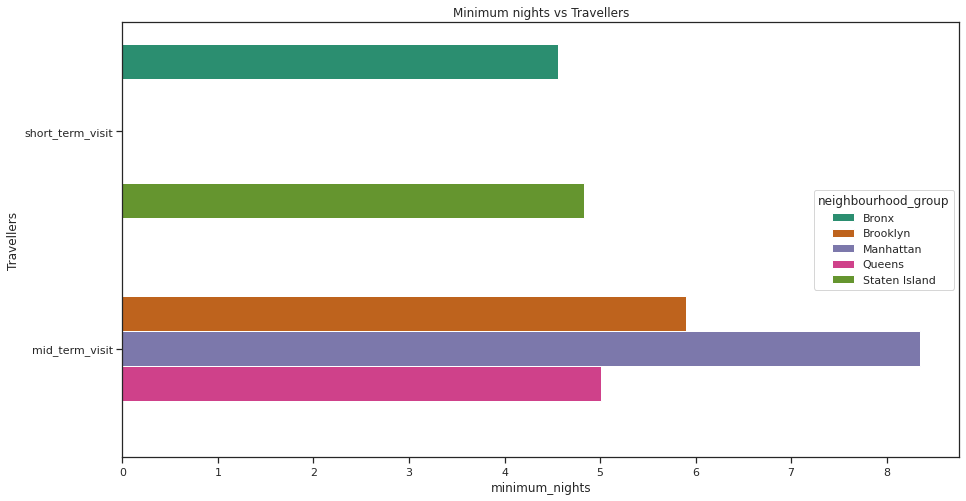

In [52]:
# Plot barplot for the above visualization
fig = plt.figure(figsize=(15, 8))
sns.set_theme(style="ticks")
sns.barplot(data= visit_df, x='minimum_nights', y='Travellers', hue ='neighbourhood_group', palette="Dark2")
plt.title('Minimum nights vs Travellers')

### Inferences

1) On the basis of hosts allowing minimum mandatory stay Manhattan, Queens and Brooklyn hosts prefer customers having a minimum 'Mid-term visit' whereas hosts in Bronx and Staten Island prefer customers having a minimum 'Short-term visit'.

2) Bronx and Staten Island can be preferred for shorter stays over other neighbourhoods making it budget friendly to some extent.

3) Manhattan and Brooklyn being posh areas and the implementaion of higher mandatory stays for single booking will be make these trips/visits expensive.

4) Different marketing initiatives can be rolled out based on the mandatory stay period in following neighbourhoods.

# Scope and Limitations:
1. Datasets have limiting attributes to classify various categories of properties.
2. Customer experiential and Category wise ratings for Hosts seemed to be missing which could have played an important role in identifying Star Hosts.
3. A lot of guest information were missing like Purpose of Visit, Number of Guests, which could have given a sense of understanding about 4. the relation of customer footfall and neighbourhoods.
Key attributes of properties like Number of Beds, Closets, Bathrooms, Gym, Sauna, Property Age, Distances from nearest Hospitals, Shopping Complexes, Airport, Station were missing.


# Conclusion:
Manhattan and Brooklyn are the posh areas in NY as  there is  maximum footfall and properties based on prices and listings are are on the higher side.
Manhattan and Brooklyn have the highest number of hosts.
Manhattan has highest number of Private rooms and Entire House/Apt. in culmination followed by Brooklyn.
Highest accommodations of 10,000 USD are available at Manhattan, Brooklyn and Queens.
Most popular hosts are Sonder, Blueground ,Kara to name a few based on number of reviews and calculated host listing counts.
Staten Island seems more to be available for booking throughout the year compared to other neighbourhoods.
Sonder,Blueground ,Sally are some of the top hosts based on their turnover.
Financial District, Midtown, Chelsea are some of the top neighbourhood based on their turnover.
Shared rooms are mostly available over other room types and Entire Home /Apt which has the highest proportion of room share are mostly on the expensive ends.
Fort Wadsworth and Woodrow are expensive neighbourhood based on median listed price belonging to Staten Island.
Most hosts allow a minimum 5 nights mandatory stay for single booking but the average increases in case of Manhattan, Brooklyn and Queens.
Bronx and Staten Island are mostly preferred for Shorter visits and onwards and others are for slightly longer stays.


In [64]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!cp /content/drive/MyDrive/AlmaBetter/capstone/Airbnb_Bookings_Analysis-Capstone_Project_01.ipynb ./
!jupyter nbconvert --to PDF 'Airbnb_Bookings_Analysis-Capstone_Project_01.ipynb'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
texlive is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive
[NbConvertApp] Converting notebook Airbnb_Bookings_Analysis-Capstone_Project_01.ipynb to PDF
[NbConvertApp] Support files will be in Airbnb_Bookings_Analysis-Capstone_Project_01_files/
[NbConvertApp] Making directory ./Airbnb_Bookings_Analysis-Capstone_Project_01_files
[NbConvertApp] Making directory ./Airbnb_Bookings_Analysis-